# IMDB Dataset

A major data set that we used for validating our results the IMDB data set [5] is updated regularly (daily, with only a few exceptions).  The data in this data set was initially in multiple files, we preprocessed the data to be one the table (title and corresponding ratings).

In [1]:
import pandas as pd

# Read the TSV file
data = pd.read_csv('data/data.tsv', sep='\t',usecols=[0,2])

# Display the data
data['title']

0                          Карменсіта
1                          Carmencita
2           Carmencita - spanyol tánc
3                          Καρμενσίτα
4                          Карменсита
                      ...            
36361497               Episódio #3.20
36361498               Episodio #3.20
36361499                 एपिसोड #3.20
36361500                     The Wind
36361501                     The Wind
Name: title, Length: 36361502, dtype: object

In [2]:
data.head()

,titleId,title
0,tt0000001,Карменсіта
1,tt0000001,Carmencita
2,tt0000001,Carmencita - spanyol tánc
3,tt0000001,Καρμενσίτα
4,tt0000001,Карменсита


There were multiple instances for the same movies due the different languages the movie might be in. Hence, we have decided to remove duplicates and keep only one instance per movie.

In [3]:
data.drop_duplicates(subset=['titleId'],inplace=True)

In [4]:
data.head()

,titleId,title
0,tt0000001,Карменсіта
8,tt0000002,Le clown et ses chiens
16,tt0000003,Sarmanul Pierrot
25,tt0000004,Un bon bock
33,tt0000005,Blacksmith Scene


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7136813 entries, 0 to 36361500
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   titleId  object
 1   title    object
dtypes: object(2)
memory usage: 163.3+ MB


In [6]:
# Read the TSV file
ratings = pd.read_csv('data/ratings.tsv', sep='\t')

# Display the data
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1982
1,tt0000002,5.8,265
2,tt0000003,6.5,1838
3,tt0000004,5.5,178
4,tt0000005,6.2,2625


The title of the movies and the rating were in two different tables: we performed a join operation to have a single table with all the needed data.

In [7]:
data = data.set_index('titleId')
ratings = ratings.set_index('tconst')

movies = pd.merge(data, ratings, left_on='titleId',right_on='tconst', how='left')

In [8]:
movies.head()

,title,averageRating,numVotes
0,Карменсіта,5.7,1982.0
1,Le clown et ses chiens,5.8,265.0
2,Sarmanul Pierrot,6.5,1838.0
3,Un bon bock,5.5,178.0
4,Blacksmith Scene,6.2,2625.0


## Analysis

The IMBD dataset is huge with average rating varying from 0 to 10. The range with the highest average ratings was between 6 and 8.

array([[<AxesSubplot:title={'center':'averageRating'}>]], dtype=object)

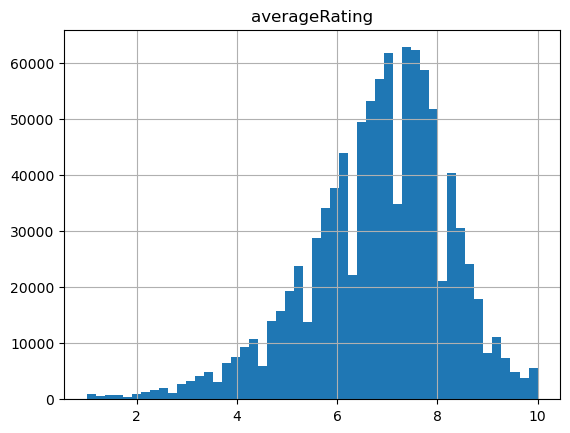

In [18]:
movies[['averageRating']].hist(bins=50)

For our project we have only considereded the extreme cases: we classified as negative the movies with a rating less than 4 and as positive movies with rating more than 7.

In [9]:
TargetMovies = movies[(movies['averageRating'] > 7) | (movies['averageRating'] <4)]


In [10]:
(TargetMovies['averageRating']<4).sum()

38414

In [11]:
(TargetMovies['averageRating']>7).sum()

474171

array([[<AxesSubplot:title={'center':'averageRating'}>]], dtype=object)

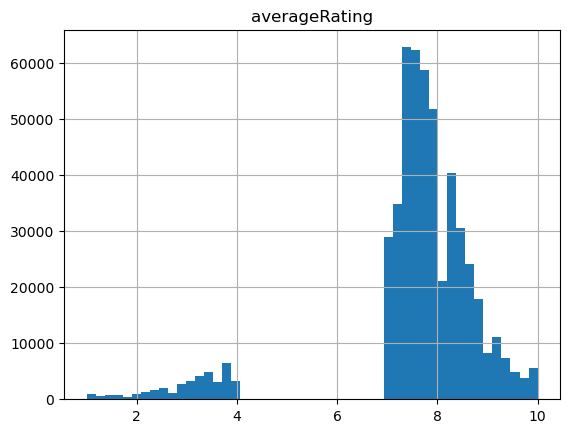

In [17]:
TargetMovies[['averageRating']].hist(bins=50)

In [12]:
(TargetMovies['title'] =="").sum()

0

In [13]:
# Use only targetMovies, fiuther in the code.

In [14]:
indices = (TargetMovies['title'].str.contains("spiderman", case=False)).loc[lambda x: x].index


In [15]:
TargetMovies.loc[indices]

,title,averageRating,numVotes
681344,The Origin of Spiderman,7.7,126.0
690616,"Spidermandy/Be A-Fred, Be Very A-Fred",8.2,71.0
777544,Spectacular Spiderman,8.3,17503.0
3533004,The Amazing Spiderman 2 Webb Cut,7.8,25.0
3889182,"Superman, Spiderman lub Batman",7.7,387.0
4545072,Amazing Spiderman Syndrome,9.0,7.0
4703179,Italian Spiderman,7.9,1134.0
5904656,Spiderman in Cannes,7.4,32.0
6375935,Discount Spiderman: Origins,9.4,5.0


In [16]:
#TargetMovies.to_csv('movies.csv')